> 

# SimpleBooks

- V18: b828879
- V20-21: ffd2392d886795bc26086e15c33a17934602f11b

In [1]:
!git clone --branch main https://github.com/gao-hongnan/omniverse.git

Cloning into 'omniverse'...
remote: Enumerating objects: 13516, done.
remote: Counting objects: 100% (925/925), done.
remote: Compressing objects: 100% (374/374), done.
remote: Total 13516 (delta 648), reused 731 (delta 520), pack-reused 12591
Receiving objects: 100% (13516/13516), 30.52 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (8922/8922), done.


In [2]:
%cd /kaggle/working/omniverse
# !git checkout 2de36b119217348181b0fb1c4aa8d71fdcb3c56e

/kaggle/working/omniverse


In [3]:
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras  # Upgrade to Keras 3.
!pip install tensorflow>=2.15.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.1.1 which is incompatible.
tensorflowjs 4.14.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.14.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


In [4]:
%pip install -q -r requirements.txt
%pip install -U torch torchaudio --no-cache-dir

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.1 which is i

In [5]:
import sys
if '/kaggle/working/omniverse' not in sys.path:
    sys.path.append('/kaggle/working/omniverse')

In [6]:
# import os

# # Set the environment variable
# os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# # Verify that it's set
# print(os.environ['PYTORCH_CUDA_ALLOC_CONF'])

In [7]:
import math
from typing import Dict, List, Optional

import matplotlib.pyplot as plt


def save_plot_history(history: Dict[str, List[float]], plot: bool = False, save_path: Optional[str] = None) -> None:
    plt.rcParams["font.family"] = "DejaVu Sans"

    num_metrics = len(history.keys())
    num_cols = 2
    num_rows = math.ceil(num_metrics / num_cols)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    axs = axs.flatten()

    for i, metric in enumerate(history.keys()):
        axs[i].plot(history[metric])
        axs[i].set_title(metric)
        axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Remove unused subplots
    for i in range(num_metrics, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()

    if plot:
        plt.show()  # type: ignore[no-untyped-call]

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using TensorFlow backend
282386239/282386239 [==============================] - 30s 0us/step


100%|██████████| 1/1 [00:00<00:00, 7854.50it/s]
/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Composer(
│   constants=MaybeConstant(),
│   logger=LoggerConfig(
│   │   log_file=None,
│   │   module_name=None,
│   │   propagate=False,
│   │   log_root_dir=None,
│   │   rich_handler_config={
│   │   │   'level': 'INFO',
│   │   │   'console': MISSING,
│   │   │   'show_level': True,
│   │   │   'show_path': True,
│   │   │   'show_time': True,
│   │   │   'rich_tracebacks': True,
│   │   │   'markup': True,
│   │   │   'log_time_format': '[%Y-%m-%d %H:%M:%S]'
│   │   }
│   ),
│   global_=MaybeGlobal(seed=42, debug=False, debug_samples=256),
│   data=DataConfig(
│   │   context_length=128,
│   │   dataset_name=None,
│   │   dataset_size=2,
│   │   dataset_path=None,
│   │   dataset_dir=None,
│   │   dataset_url=None,
│   │   split=[0.7, 0.1, 0.2],
│   │   collate_fn={'batch_first': True, 'pad_token_id': 16},
│   │   train_loader={
│   │   │   'batch_size': 32,
│   │   │   'shuffle': True,
│   │   │   'num_workers': 0,
│   │   │   'pin_memory': False,
│   │   │   'drop_last': False
│   │   },
│   │   valid_loader={
│   │   │   'batch_size': 32,
│   │   │   'shuffle': False,
│   │   │   'num_workers': 0,
│   │   │   'pin_memory': False,
│   │   │   'drop_last': False
│   │   },
│   │   test_loader={
│   │   │   'batch_size': 32,
│   │   │   'shuffle': False,
│   │   │   'num_workers': 0,
│   │   │   'pin_memory': False,
│   │   │   'drop_last': False
│   │   }
│   ),
│   model=DecoderConfig(
│   │   d_model=256,
│   │   vocab_size=4861,
│   │   context_length=128,
│   │   num_decoder_blocks=2,
│   │   dropout=0.2,
│   │   decoder_block=DecoderBlockConfig(
│   │   │   masked_self_attention_mha=MultiHeadedAttentionConfig(
│   │   │   │   attention=ScaledDotProductAttention(
  (dropout): Dropout(p=0.0, inplace=False)
),
│   │   │   │   d_model=256,
│   │   │   │   H=4,
│   │   │   │   dropout=0.2
│   │   │   ),
│   │   │   feed_forward=PositionwiseFeedForwardConfig(
│   │   │   │   d_model=256,
│   │   │   │   d_ff=1024,
│   │   │   │   activation=GELU(approximate='tanh'),
│   │   │   │   dropout=0.2,
│   │   │   │   bias=True
│   │   │   ),
│   │   │   add_norm_1=AddNormConfig(feature_dim=256, dropout=0.2),
│   │   │   add_norm_2=AddNormConfig(feature_dim=256, dropout=0.2)
│   │   )
│   ),
│   optimizer=AdamConfig(name='torch.optim.Adam', lr=0.001, betas=(0.9, 0.98), eps=1e-09, weight_decay=0.0),
│   criterion=CrossEntropyLossConfig(
│   │   name='torch.nn.CrossEntropyLoss',
│   │   weight=None,
│   │   size_average=None,
│   │   ignore_index=-100,
│   │   reduction='mean',
│   │   label_smoothing=0.0
│   ),
│   scheduler=CosineAnnealingLRConfig(
│   │   name='torch.optim.lr_scheduler.CosineAnnealingLR',
│   │   T_max=8,
│   │   eta_min=0,
│   │   last_epoch=-1,
│   │   verbose=False
│   ),
│   trainer=TrainerConfig(
│   │   device=device(type='cuda'),
│   │   max_epochs=8,
│   │   log_every_n_steps=10000,
│   │   eval_every_n_steps=10000,
│   │   step_scheduler_on_batch_or_epoch='epoch',
│   │   use_amp=True,
│   │   autocast_config={'enabled': True, 'dtype': torch.float16, 'cache_enabled': True},
│   │   scaler_config={
│   │   │   'enabled': True,
│   │   │   'init_scale': 65536.0,
│   │   │   'growth_factor': 2.0,
│   │   │   'backoff_factor': 0.5,
│   │   │   'growth_interval': 2000
│   │   },
│   │   gradient_accumulation_steps=4,
│   │   clip_grad_norm={'max_norm': 1.0, 'norm_type': 2.0, 'error_if_nonfinite': False, 'foreach': None},
│   │   apply_weight_decay_to_different_param_groups=False,
│   │   save_dir='./data/simplybooks92/checkpoints/2024-03-29_11-29-41',
│   │   save_every_epoch=False,
│   │   save_best_only=True,
│   │   monitor='valid_this_epoch_average_loss',
│   │   mode='min'
│   ),
│   generator=GeneratorConfig(max_tokens=80, temperature=1.0, greedy=False, top_k=10, top_p=None)
)

2024-03-29 11:29:42,082 - root - INFO - Initial learning rate: 0.001
2024-03-29 11:29:42,084 - root - INFO - Total Parameters: 4104445, Trainable Parameters: 4104445
2024-03-29 11:29:42,085 - root - INFO - ====================================================== Starting Train Epoch: 1/8 ======================================================
Epoch: 1, Step: 1:   0%|          | 0/9778 [00:00<?, ?it/s, total_batch_loss=136.65042, average_batch_loss=2.13516, average_batch_perplexity=5110.55078, lr=0.001000000]/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected c

train_this_epoch_average_loss
[4.8803375387611165, 4.43865847368137, 4.309790557989876, 4.242468370935819, 4.19857784984399, 4.167113543678388, 4.1421090829443115, 4.12189095486988]
train_this_epoch_average_perplexity
[131.6751251220703, 84.66127014160156, 74.4249038696289, 69.57938385009766, 66.59156036376953, 64.52893829345703, 62.93540573120117, 61.67576217651367]
valid_this_epoch_average_loss
[4.355229377746582, 4.166375637054443, 4.079253673553467, 4.034135341644287, 3.991755485534668, 3.9651288986206055, 3.9476492404937744, 3.9435625076293945]
valid_this_epoch_average_perplexity
[77.88468933105469, 64.4813232421875, 59.10134506225586, 56.49405288696289, 54.149864196777344, 52.72706604003906, 51.81342315673828, 51.602108001708984]


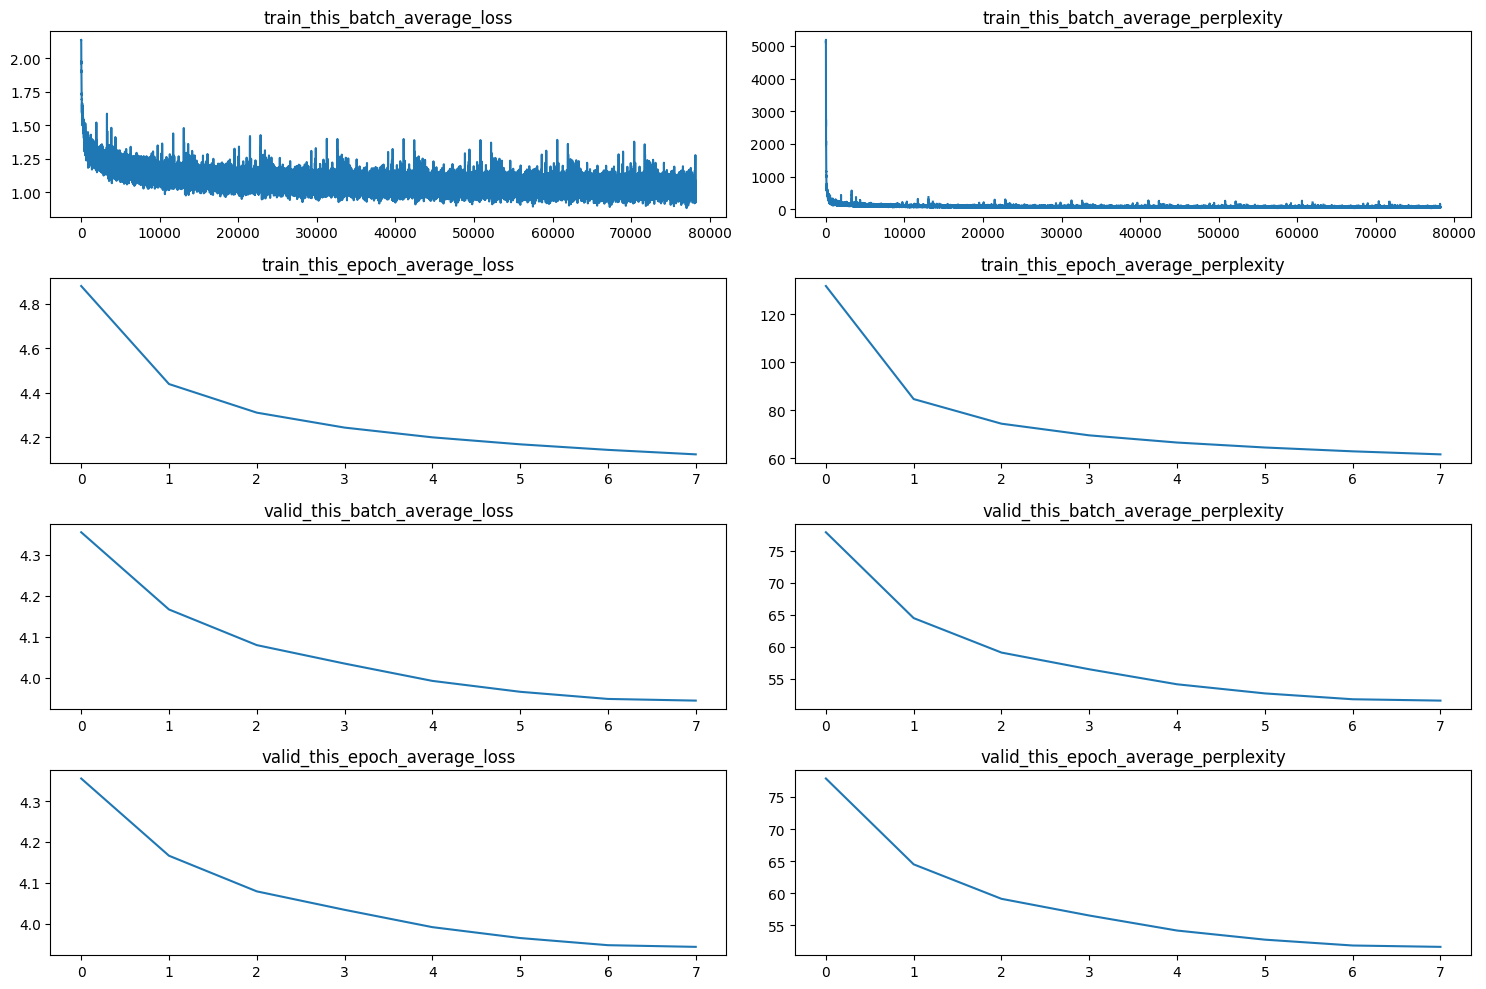

In [8]:
# type: ignore
import os
import pickle
from typing import Any, Callable, List, Tuple

import keras
import keras_nlp
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import torch
from keras.saving import deserialize_keras_object
from keras_nlp.samplers import Sampler
from numpy.typing import NDArray
from tensorflow.python.framework.ops import EagerTensor
from torch import nn
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from keras.saving import serialize_keras_object
from pathlib import Path
from omnivault.transformer.config.composer import Composer
from omnivault.transformer.config.criterion import CRITERION_REGISTRY
from omnivault.transformer.config.decoder import (
    AddNormConfig,
    DecoderBlockConfig,
    DecoderConfig,
    MultiHeadedAttentionConfig,
    PositionwiseFeedForwardConfig,
)
from omnivault.transformer.config.generator import GeneratorConfig
from omnivault.transformer.config.optim import OPTIMIZER_REGISTRY
from omnivault.transformer.config.scheduler import SCHEDULER_REGISTRY
from omnivault.transformer.config.trainer import TrainerConfig
from omnivault.transformer.core.dataset import (
    construct_dummy_batch_future_masks,
    construct_dummy_batch_target_padding_masks,
)
from omnivault.transformer.core.state import State
from omnivault.transformer.core.trainer import Trainer, TrainerEvent
from omnivault.transformer.decoder.core import GPTDecoder
from omnivault.transformer.modules.attention.core import ScaledDotProductAttention
from omnivault.transformer.utils.general_utils import cleanup
from omnivault.utils.reproducibility.seed import seed_all
# from omnivault.transformer.utils.visualization import save_plot_history
from rich.pretty import pprint

seed_all(seed=20230310, set_torch_deterministic=False)
tf.random.set_seed(20230310)

# Paths
DATA_URL: str = "https://dldata-public.s3.us-east-2.amazonaws.com/simplebooks.zip"
BASE_DATA_DIR: str = os.path.join(os.path.expanduser("~/.keras/datasets/"), "simplebooks/")
TRAIN_FILE: str = os.path.join(BASE_DATA_DIR, "simplebooks-92-raw/train.txt")
VALID_FILE: str = os.path.join(BASE_DATA_DIR, "simplebooks-92-raw/valid.txt")

TRAIN_DATASET_PICKLED_PATH = "/kaggle/input/simplebooks-92/train_dataset.pkl"
VALID_DATASET_PICKLED_PATH = "/kaggle/input/simplebooks-92/valid_dataset.pkl"
SAVE_DATASET_AS_PICKLE = True
LOAD_DATASET_FROM_PICKLE = False
COMPUTE_WORD_PIECE_VOCABULARY = True


# Data
BATCH_SIZE = 64
MIN_STRING_LEN = 512  # Strings shorter than this will be discarded
SEQ_LEN = 128  # Length of training sequences, in tokens

# Vocabulary
VOCABULARY_SERIALIZABLED: str = "/kaggle/input/simplebooks-92/vocabulary_serializabled.pkl"
VOCAB_SIZE = 5000  # Limits parameters in model.

# Training
GRADIENT_ACCUMULATION_STEPS = 4
BASE_LR = 0.00025
BASE_TRAIN_BATCH_SIZE = 16
NUM_GPUS = 1

# Inference
NUM_TOKENS_TO_GENERATE = 80


def download_and_extract_data(url: str) -> str:
    """Download and extract dataset from a given URL."""
    return keras.utils.get_file(origin=url, extract=True)


def load_and_prepare_dataset(
    file_path: str, batch_size: int, min_string_len: int, shuffle: bool = False, mode: str = "train"
) -> tf.data.TextLineDataset:
    """Prepare the dataset by loading, filtering and batching."""
    dataset = tf.data.TextLineDataset(file_path)
    dataset = dataset.filter(lambda x: tf.strings.length(x) > min_string_len)
    dataset = dataset.batch(batch_size)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=256)
    

    return dataset


def load_vocab(vocab_file: str) -> List[str]:
    """Load the vocabulary from a serialized file."""
    try:
        with open(vocab_file, "rb") as f:
            vocab_config = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f"Vocabulary file not found: {vocab_file}") from None
    except Exception as err:
        raise Exception(f"Error loading vocabulary: {str(err)}") from err

    return deserialize_keras_object(vocab_config)


def create_tokenizer(vocabulary: List[str], seq_len: int) -> keras_nlp.tokenizers.WordPieceTokenizer:
    """
    Create a WordPiece tokenizer and a StartEnd packer using the given
    vocabulary and sequence length.
    """
    tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
        vocabulary=vocabulary,
        sequence_length=seq_len,
        lowercase=True,
    )

    return tokenizer


def create_start_packer(tokenizer: keras_nlp.tokenizers.WordPieceTokenizer) -> keras_nlp.layers.StartEndPacker:
    """Create a StartEnd packer using the given tokenizer."""
    assert tokenizer.sequence_length == SEQ_LEN
    return keras_nlp.layers.StartEndPacker(
        sequence_length=tokenizer.sequence_length,
        start_value=tokenizer.token_to_id("[BOS]"),
    )


def preprocess(inputs: tf.Tensor) -> Tuple[tf.Tensor, tf.Tensor]:
    """
    Preprocess the input data by tokenizing and then packing with start tokens.

    Parameters
    ----------
    inputs : tf.Tensor
        Input text data in tensor format.

    Returns
    -------
    Tuple[tf.Tensor, tf.Tensor]
        A tuple containing:
        - features: Tokenized and packed input sequences.
        - labels: Tokenized output sequences (identical to `outputs` from tokenizer).
    """
    outputs = tokenizer(inputs)
    features = start_packer(outputs)
    labels = outputs
    return features, labels


def prepare_and_preprocess_dataset(
    dataset: tf.data.Dataset, preprocess_fn: Callable[[tf.Tensor], Tuple[tf.Tensor, tf.Tensor]]
) -> tf.data.Dataset:
    """
    Prepares the dataset by applying preprocessing, batching, and prefetching.

    Parameters
    ----------
    dataset: tf.data.Dataset
        The raw dataset to be processed.
    preprocess_fn: callable
        The preprocessing function to be applied to the dataset.
    batch_size: int
        The size of batches to divide the dataset into.

    Returns
    -------
    tf.data.Dataset
        The processed and batched dataset.
    """
    return dataset.map(preprocess_fn, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)


def flatten_dataset(dataset: List[Tuple[np.ndarray, np.ndarray]]) -> List[Tuple[np.ndarray, np.ndarray]]:
    """
    Flatten each pair of source and target arrays in the dataset from shape [B, L] to [B*L].

    Parameters
    ----------
    dataset : List[Tuple[np.ndarray, np.ndarray]]
        The dataset to be flattened, consisting of tuples of source and target numpy arrays.

    Returns
    -------
    List[Tuple[np.ndarray, np.ndarray]]
        The flattened dataset, where each source and target array is reshaped to [B*L].
    """
    flattened_data = [
        (source[i].reshape(-1), target[i].reshape(-1))
        for source, target in tqdm(dataset)
        for i in range(source.shape[0])
    ]
    return flattened_data


class TFDatasetWrapper(Dataset):
    def __init__(self, tf_dataset_as_numpy: List[int]) -> None:
        super().__init__()
        self.tf_dataset_as_numpy = tf_dataset_as_numpy

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        source, target = self.tf_dataset_as_numpy[index]

        # Convert from list to tensors
        source = torch.tensor(source, dtype=torch.long)
        target = torch.tensor(target, dtype=torch.long)
        return source, target

    def __len__(self) -> int:
        return len(self.tf_dataset_as_numpy)


def custom_collate_fn(
    batch: List[Tuple[torch.Tensor, torch.Tensor]]
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    sources, targets = zip(*batch)

    sources = torch.stack(sources)
    targets = torch.stack(targets)

    batch_size, seq_len = targets.size(0), targets.size(1)

    future_masks = construct_dummy_batch_future_masks(batch_size, seq_len)
    target_padding_masks = construct_dummy_batch_target_padding_masks(batch_size, seq_len)

    return sources, targets, future_masks, target_padding_masks


def next(prompt: tf.Tensor, cache: Tuple[Any, ...], index: EagerTensor) -> Tuple[tf.Tensor, None, Tuple[Any, ...]]:
    prompt: NDArray[np.int32] = prompt.numpy()
    prompt: torch.LongTensor = torch.from_numpy(prompt).to(composer.trainer.device)

    index: int = int(index)
    with torch.no_grad():
        logits: torch.Tensor = model(prompt)[:, index - 1, :]
    logits: NDArray[float] = logits.detach().cpu().numpy()
    logits: tf.Tensor = tf.convert_to_tensor(logits)
    # Ignore hidden states for now; only needed for contrastive search.
    hidden_states = None
    return logits, hidden_states, cache


@torch.no_grad()
def generate_on_train_epoch_end(trainer: Trainer) -> None:
    """Evaluate and generate on train batch end."""

    import gc
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        
    model = trainer.model
    model.eval()

    def get_samplers() -> List[Sampler]:
        samplers = [
            keras_nlp.samplers.GreedySampler(temperature=1.0),
            keras_nlp.samplers.BeamSampler(num_beams=10, temperature=1.0),
            keras_nlp.samplers.RandomSampler(temperature=1.0),
            keras_nlp.samplers.TopKSampler(k=10, temperature=1.0),
            keras_nlp.samplers.TopPSampler(p=0.5, temperature=1),
        ]
        return samplers

    samplers = get_samplers()
    tokenizer = trainer.state.tokenizer

    start_packer = create_start_packer(tokenizer)
    # The "packer" layers adds the [BOS] token for us.
    prompt_tokens = start_packer(tokenizer([""]))

    for sampler in samplers:
        generated_tokens = sampler(
            next=next,
            prompt=prompt_tokens,
            index=1,  # Start sampling immediately after the [BOS] token.
        )
        generated_tokens_decoded = tokenizer.detokenize(generated_tokens)
        sampler_name = sampler.__class__.__name__
        trainer.logger.info("%s search Generated text %s", sampler_name, generated_tokens_decoded)
    # Revert model to training mode
    model.train()


if __name__ == "__main__":
    download_and_extract_data(DATA_URL)
    raw_train_ds = load_and_prepare_dataset(TRAIN_FILE, BATCH_SIZE, MIN_STRING_LEN, shuffle=True)
    raw_valid_ds = load_and_prepare_dataset(VALID_FILE, BATCH_SIZE, MIN_STRING_LEN, shuffle=False)
    
    if COMPUTE_WORD_PIECE_VOCABULARY:
        vocabulary = keras_nlp.tokenizers.compute_word_piece_vocabulary(
            raw_train_ds,
            vocabulary_size=VOCAB_SIZE,
            lowercase=True,
            reserved_tokens=["[PAD]", "[UNK]", "[BOS]"],
        )
#         with open(VOCABULARY_SERIALIZABLED, "wb") as f:
#             pickle.dump(serialize_keras_object(vocabulary), f)
    else:
        vocabulary = load_vocab(VOCABULARY_SERIALIZABLED)

    tokenizer = create_tokenizer(vocabulary, SEQ_LEN)
    start_packer = create_start_packer(tokenizer)

    train_ds = prepare_and_preprocess_dataset(raw_train_ds, preprocess)
    valid_ds = prepare_and_preprocess_dataset(raw_valid_ds, preprocess)
    
#     if LOAD_DATASET_FROM_PICKLE:
#         with open(TRAIN_DATASET_PICKLED_PATH, "rb") as file:
#             train_ds_as_list_of_numpy = pickle.load(file)

#         with open(VALID_DATASET_PICKLED_PATH, "rb") as file:
#             valid_ds_as_list_of_numpy = pickle.load(file)

    if SAVE_DATASET_AS_PICKLE and not LOAD_DATASET_FROM_PICKLE:
        train_ds_as_list_of_numpy = list(tfds.as_numpy(train_ds))
        valid_ds_as_list_of_numpy = list(tfds.as_numpy(valid_ds))

#         with open(TRAIN_DATASET_PICKLED_PATH, "wb") as file:
#             pickle.dump(train_ds_as_list_of_numpy, file)

#         with open(VALID_DATASET_PICKLED_PATH, "wb") as file:
#             pickle.dump(valid_ds_as_list_of_numpy, file)

    train_ds_as_numpy = flatten_dataset(train_ds_as_list_of_numpy)
    valid_ds_as_numpy = flatten_dataset(valid_ds_as_list_of_numpy)

    train_ds_pytorch = TFDatasetWrapper(train_ds_as_numpy)
    valid_ds_pytorch = TFDatasetWrapper(valid_ds_as_numpy)

    # Create a PyTorch data loader
    train_loader = DataLoader(
        train_ds_pytorch, shuffle=False, batch_size=16, collate_fn=custom_collate_fn
    )  # shuffled by tensorflow earlier
    valid_loader = DataLoader(
        valid_ds_pytorch, shuffle=False, batch_size=32, collate_fn=custom_collate_fn
    )  # shuffled by tensorflow earlier

    masked_self_attention_mha_config = MultiHeadedAttentionConfig(
        attention=ScaledDotProductAttention(), d_model=256, H=4, dropout=0.2
    )

    feed_forward_config = PositionwiseFeedForwardConfig(
        d_model=256, d_ff=256 * 4, activation=nn.GELU(approximate="tanh"), dropout=0.2, bias=True
    )

    add_norm_config_1 = AddNormConfig(feature_dim=256, dropout=0.2)
    add_norm_config_2 = AddNormConfig(feature_dim=256, dropout=0.2)

    # Create DecoderBlockConfig
    decoder_block_config = DecoderBlockConfig(
        masked_self_attention_mha=masked_self_attention_mha_config,
        feed_forward=feed_forward_config,
        add_norm_1=add_norm_config_1,
        add_norm_2=add_norm_config_2,
    )

    # Create the overall DecoderConfig
    model_config = DecoderConfig(
        d_model=256,
        vocab_size=len(vocabulary),
        context_length=SEQ_LEN,
        num_decoder_blocks=2,
        dropout=0.2,
        decoder_block=decoder_block_config,
    )

    optimizer_config_cls = OPTIMIZER_REGISTRY["torch.optim.Adam"]
    optimizer_pydantic_config = optimizer_config_cls(name="torch.optim.Adam", lr=BASE_LR * GRADIENT_ACCUMULATION_STEPS)

    criterion_config_cls = CRITERION_REGISTRY["torch.nn.CrossEntropyLoss"]
    criterion_pydantic_config = criterion_config_cls(name="torch.nn.CrossEntropyLoss")

    scheduler_config_cls = SCHEDULER_REGISTRY["torch.optim.lr_scheduler.CosineAnnealingLR"]
    scheduler_pydantic_config = scheduler_config_cls(name="torch.optim.lr_scheduler.CosineAnnealingLR", T_max=8)

    trainer_config = TrainerConfig(
        device="cuda",
        max_epochs=8,
        eval_every_n_steps=10000,
        log_every_n_steps=10000,
        use_amp=True,
        autocast_config={"enabled": True, "dtype": torch.float16, "cache_enabled": True},
        scaler_config={
            "enabled": True,
            "init_scale": 2.0**16,
            "growth_factor": 2.0,
            "backoff_factor": 0.5,
            "growth_interval": 2000,
        },
        gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,
        clip_grad_norm={"max_norm": 1.0, "norm_type": 2.0, "error_if_nonfinite": False, "foreach": None},
        apply_weight_decay_to_different_param_groups=False,
        step_scheduler_on_batch_or_epoch="epoch",
        save_dir="./data/simplybooks92/checkpoints",
        save_every_epoch=False,
        save_best_only=True,
        monitor="valid_this_epoch_average_loss",
        mode="min",
    )

    generator_config = GeneratorConfig(temperature=1.0, max_tokens=80, greedy=False, top_k=10, top_p=None)

    composer = Composer(
        model=model_config,
        optimizer=optimizer_pydantic_config,
        criterion=criterion_pydantic_config,
        scheduler=scheduler_pydantic_config,
        trainer=trainer_config,
        generator=generator_config,
    )
    model = GPTDecoder(model_config).to(composer.trainer.device)
    optimizer = optimizer_pydantic_config.build(params=model.parameters())
    criterion = criterion_pydantic_config.create_instance()

    composer.scheduler = scheduler_pydantic_config
    scheduler = scheduler_pydantic_config.build(optimizer=optimizer)

    composer.pretty_print()

    state = State(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        vocabulary=vocabulary,
        tokenizer=tokenizer,
    )

    device = composer.trainer.device
    trainer = Trainer(
        state=state,
        composer=composer,
        logger=None,
        device=device,  # type: ignore[arg-type]
    )
    trainer.add_callback(TrainerEvent.ON_TRAIN_EPOCH_END.value, generate_on_train_epoch_end)
    
    import gc
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        
    _trained_state = trainer.fit(train_loader=train_loader, valid_loader=valid_loader)
    # _trained_state.pretty_print()
    history = _trained_state.history
    for key in history:
        
        if "epoch" in key:
            print(key)
            print(history[key])
            
    _ = save_plot_history(history, plot=False, save_path=f"{composer.trainer.save_dir}/history.png")

    cleanup([optimizer, state, trainer])


## Inference/Generation

In [9]:
from omnivault.utils.reproducibility.seed import seed_all
import tensorflow as tf

seed_all()
tf.random.set_seed(1992) 

/kaggle/working/omniverse/omnivault/utils/reproducibility/seed.py:102: UserWarning: Deterministic mode is activated. This will negatively impact performance and may cause increase in CUDA memory footprint.
  configure_deterministic_mode()


In [10]:
model.eval() # important!

# The "packer" layers adds the [BOS] token for us.
prompt_tokens = start_packer(tokenizer([""]))
prompt_tokens

def next(prompt, cache, index):
    prompt = prompt.numpy()
    prompt = torch.from_numpy(prompt).to(composer.trainer.device)
#     print(prompt)
#     print(prompt.shape)
#     print(model(prompt))
#     print(index)

    index = int(index)
    with torch.no_grad():
        logits = model(prompt)[:, index - 1, :]
    logits = logits.detach().cpu().numpy()
    logits = tf.convert_to_tensor(logits)
    # Ignore hidden states for now; only needed for contrastive search.
    hidden_states = None
    return logits, hidden_states, cache

In [11]:
sampler = keras_nlp.samplers.GreedySampler()
output_tokens = sampler(
    next=next,
    prompt=prompt_tokens,
    index=1,  # Start sampling immediately after the [BOS] token.
)
txt = tokenizer.detokenize(output_tokens)
print(f"Greedy search generated text: \n{txt}\n")


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/linear.py:116: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:164.)
  return F.linear(input, self.weight, self.bias)
/kaggle/working/omniverse/omnivault/transformer/modules/attention/core.py:248: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because 

Greedy search generated text: 
[b'[BOS] " i don \' t know what i can do . i don \' t know what i can do . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i want . i don \' t know what i']



In [12]:
sampler = keras_nlp.samplers.TopKSampler(k=10)
output_tokens = sampler(
    next=next,
    prompt=prompt_tokens,
    index=1,
)
txt = tokenizer.detokenize(output_tokens)
print(f"Top-K search generated text: \n{txt}\n")

Top-K search generated text: 
[b'[BOS] the boys had been in charge of the men , and were now ordered to be brought out to the place and to give the order to order the news of the arrival of the brig . the officers was to take off their position and to the south to the south , as to the east of the north and south . they had already been ordered , for they were now to join the convention of the spanish army . they were ordered to be sent to be the most valuable time before , and , on their way along the side of the river at a point where they was advancing . this latter was to take place where they']



In [13]:
sampler = keras_nlp.samplers.TopPSampler(p=0.5)
output_tokens = sampler(
    next=next,
    prompt=prompt_tokens,
    index=1,
)
txt = tokenizer.detokenize(output_tokens)
print(f"Top-P search generated text: \n{txt}\n")

Top-P search generated text: 
[b'[BOS] the prince \' s majesty \' s majesty was informed of that prince eunuchs , and at this time she was not a very dislike person . he was informed of the two other knights that had been a very successful one , but as soon as she had said , he would not have given any answer to the officer , and he would have seen her majesty talking . he was glad to hear her majesty talking about the princess \' s majesty , and said that she would be willing to speak , " the prince said , " i have been the daughter of the prince of application . you have not yet seen']



## Train and Serialize Keras's Word Piece Vocabulary

In [14]:
# # Train tokenizer vocabulary
# vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(
#     raw_train_ds,
#     vocabulary_size=VOCAB_SIZE,
#     lowercase=True,
#     reserved_tokens=["[PAD]", "[UNK]", "[BOS]"],
# )

In [15]:
# import pickle

# # Assume `vocab` is your vocabulary object
# with open('vocabulary.pkl', 'wb') as f:
#     pickle.dump(vocab, f)


In [16]:
# from keras.saving import serialize_keras_object
# from keras.layers import Dense

# vocab_obj = serialize_keras_object(vocab)
# # Assume `vocab` is your vocabulary object
# with open('vocabulary_serializabled.pkl', 'wb') as f:
#     pickle.dump(vocab, f)
